### Table of Contents
- 1. [Problem Statement](#section1)</br>
    - 1.1 [Introduction](#section101)<br/>
    - 1.2 [Data source and data set](#section102)<br/>
- 2. [Load the packages and data](#section2)</br>
- 3. [Data profiling](#section3)</br>
    - 3.1 [dtypes](#section301)<br/>
    - 3.2 [head](#section302)<br/>
    - 3.3 [describe](#section303)<br/>
    - 3.4 [sample](#section304)<br/>
    - 3.5 [Pandas profiling](#section305)<br/>
    - 3.6 [Initial observations](#section306)<br/>
- 4. [Data normalization](#section4)</br>
    - 4.1 [Drop Duplicates](#section401)<br/>
    - 4.2 [Missing data and its imputation](#section402)<br/>
    - 4.3 [Post Profiling of data after cleaning](#section403)<br/>
- 5. [Analysis through questions](#section5)</br>
     - 5.1 [Which is the year in which maximum number of events were conducted?](#section501)<br/>
     - 5.2 [What is the ratio of Men vs Women Athletes?](#section502)<br/>        
     - 5.3 [In which year maximum women and men participated?](#section503)<br/>
     - 5.4 [In which year maximun number of medals were won?](#section504)<br/>
     - 5.5 [Which is the country that has won maximum number of medals?](#section505)<br/>
     - 5.6 [Which countries hve participated in which year? ](#section506)<br/>
     - 5.7 [ Countrywise Mave vs Female](#section507)<br/>
     - 5.8 [Countrywise medals won every year ](#section508)<br/>
     - 5.9 [Performance of the countries till 2012](#section509)<br/>
     - 5.10 [Which cities have hosted olympic games more than one time? ](#section510)<br/>
         
- 6. [Conclusion](#section6)<br/>

<a id=section1></a> 
## 1. Problem Statement ![image.jpg](attachment:image.jpg)

"This dataset is about the summer olympics conducted from 1896 to 2012. It provides the details of the hosting cities, participating countries, the events conducted and the medals won by the athletes.__Summer Olympics__."
<a id=section101></a> 
### 1.1. Introduction
This Exploratory Data Analysis is to practice Python skills learned till now on a structured data set including loading, inspecting, wrangling, exploring, and drawing conclusions from data. The notebook has observations with each step in order to explain thoroughly how to approach the data set. Based on the observation some questions also are answered in the notebook for the reference though not all of them are explored in the analysis. 

<a id=section102></a> 
### 1.2. Data source and dataset

__a__. How was it collected? 

- __Name__: "Summer Olympics"
- __Sponsoring Organization__: INSAID has provided the data set for study purpose.
- __Year__: 1896 to 2012
- __Description__:  This dataset is about the summer olympics conducted from 1896 to 2012. It provides the details of the hosting cities, participating countries, the events conducted and the medals won by the athletes.

__b__. Is it a sample? If yes, was it properly sampled?
- Yes, it is a sample. We don't have official information about the data collection method.

<a id=section2></a> 
### 2. Load the packages and data 

In [ ]:
import pandas as pd
import seaborn as sns
import pandas_profiling
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
%matplotlib inline     
#import plotly
import warnings                                                                 # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore')
#Read Data
olympic = pd.read_csv("F:\INSAID\summer olympics.csv")

<a id=section3></a> 
### 3. Data Profiling

Review the data types and sample data to understand what variables we are dealing with?<br>
Which variables need to be transformed in some way before they can be analyzed?

In [25]:
olympic.dtypes

Year           int64
City          object
Sport         object
Discipline    object
Athlete       object
Country       object
Gender        object
Event         object
Medal         object
dtype: object

In [19]:
olympic.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [20]:
olympic.describe(include = 'all')     

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
count,31163.000000,31163,31163,31163,31163,31163,31163,31163,31163
unique,NaN,22,43,67,22762,147,2,666,3
top,NaN,London,Aquatics,Athletics,"PHELPS, Michael",USA,Men,Football,Gold
freq,NaN,3566,4170,3638,22,4585,22745,1497,10484
mean,1970.481148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,33.158602,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1896.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1948.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1980.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- The data seems to be normal with very high cardinalities for the columns Athlete, Country, Event etc
- The data spans across the years starting from 1896 to 2012
- Top athlete being PHELPS, Michael from USA
- Top event is Football, top sport is aquatics, top descipline is Athletics

In [ ]:
#Generate Pre profile to identify first level data issues and store the output
preprofile = pandas_profiling.ProfileReport(olympic)
preprofile.to_file(outputfile="F:\INSAID\summer_olympic_before_profiling.html")

<a id=section306></a> 
### 3.6. Initial observations:
- Summary of data types in this dataset:
 - <em>Numeric</em>: <strong>Year</strong> (integer)
 - <em>Object</em>: Everything else
- <strong>Country</strong>: There are 4 missing values which needs correction.
- Total no of Medals won = 31163
    1. Gold = 10484
    2. Silver = 10369
    3. Bronze = 10310
    
- No of Medals Won by Men Athletes = 22745
- No of Medals won by Women Athletes = 8418

- No of Atheletes (Men + Women)= 22762
- No of Countries = 148
- No of Disciplines = 67
- No of Events = 666
- No of Unique Cities hosting the Olympic games = 22

- Top 3 Medal Winning Athletes:
    1. PHELPS, Michael - 22 Medals 
    2. LATYNINA, Larisa - 18 Medals
    3. ANDRIANOV, Nikolay - 15 Medals
    
- Top 3 cities hosting maximum number of events:
    1. London = 3566 events
    2. Athens = 2149 events
    3. Los Angeles = 2074 events

- Top 3 Disciplines having maximum number of events:
    1. Athletics = 3638  
    2. Rowing = 2667  
    3. Swimming = 2628

<a id=section4></a> 
### 4. Data Normalization

<a id=section401></a>
### 4.1. Drop duplicates

In [ ]:
#Drop duplicates
olympic = olympic.drop_duplicates()

<a id=section402></a>
### 4.2. Missing/ Wrong Data and its imputation

In [ ]:
# Correct values for Athelete(for wrong Athlete name) and Country coulmns
olympic['Athlete'] = olympic['Athlete'].replace('Pending','Dummy_Name')
olympic['Country'] = olympic['Country'].fillna('ZZX')

#Another option is to directly ignore the the rows by filtering where no values are present for Country column
#olympic = olympic[olympic.Country.notnull()]
#Filter the data where Athlete name is 'Pending'
#olympic = olympic[olympic['Athlete'] != 'Pending']

<a id=section403></a>
### 4.3. Post Profiling of data after cleaning

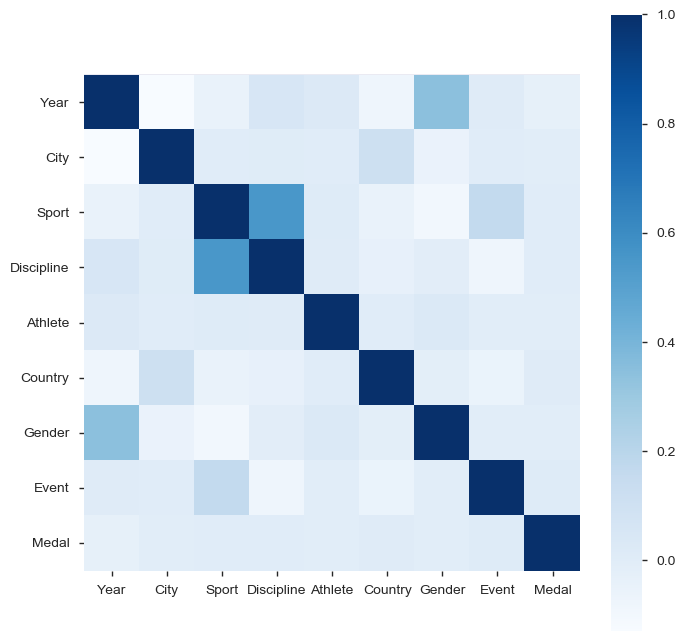

In [29]:


#Create a profile after data cleaning
preprofile = pandas_profiling.ProfileReport(olympic)
preprofile.to_file(outputfile="F:\INSAID\summer_olympic_after_profiling.html")

olympic_copy = olympic.copy(deep=True) 
number = LabelEncoder()                                                           # Here as our data set consists only of categorical values except age
for i in olympic_copy.columns:                                                          # in order to find the correlation between variables, we do Label encoding 
    olympic_copy[i] = number.fit_transform(olympic_copy[i].astype('str'))
#corr=olympic_copy.corr()['Athlete']
#corr[np.argsort(corr,axis=0)[::-1]]

features_correlation = olympic_copy.corr()
plt.figure(figsize=(8,8))
sns.heatmap(features_correlation,vmax=1,square=True,annot=False,cmap='Blues')
plt.show()


<a id=section5></a>
### 5. Analysis through questions

<a id=section501></a>
### 5.1 Which is the year in which maximum number of events were conducted?

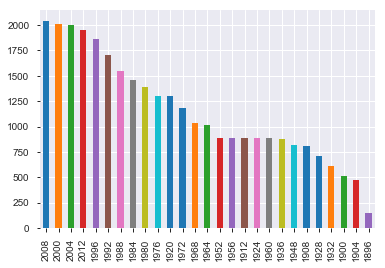

In [2]:
olympic['Year'].value_counts().plot.bar() 

The maximum number of events were conducted during the 2008 Summer Olympics and the least in 1896

<a id=section502></a>
### Section 5.2 What is the ratio of Men vs Women Athletes?

Total number of athletes participated in the olympic =  22762


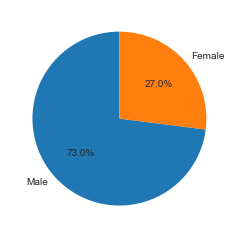

In [17]:
#Prints a pie chart showing the % of men and Women athletes 
print("Total number of athletes participated in the olympic = ",len(olympic['Athlete'].unique()))
male_count = olympic[olympic['Gender'] == 'Men']['Gender'].value_counts()
female_count = olympic[olympic['Gender'] == 'Women']['Gender'].value_counts()

athlete_gender_counts = [male_count,female_count]
gender = ['Male', 'Female']
plt.pie(athlete_gender_counts, labels=gender, startangle=90, autopct='%.1f%%')
plt.show()

- Indicates % of Men to Women athletes participation till 2012

<a id=section503></a>
### section 5.3 In which year maximum women and men participated?

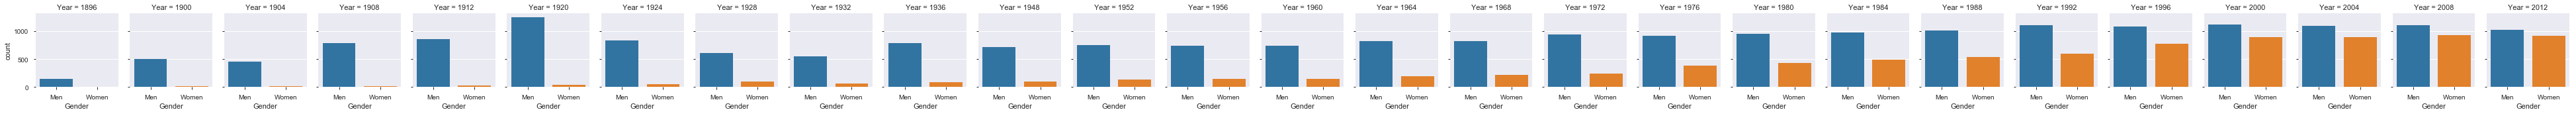

In [14]:
# Show the chart of men and women participents per year
sns.catplot('Gender', col='Year',data=olympic[olympic.Year.notnull()],kind='count',height=2.5, aspect=.8)

Text(0.5, 1.0, 'Year vs Women Athlets Count')

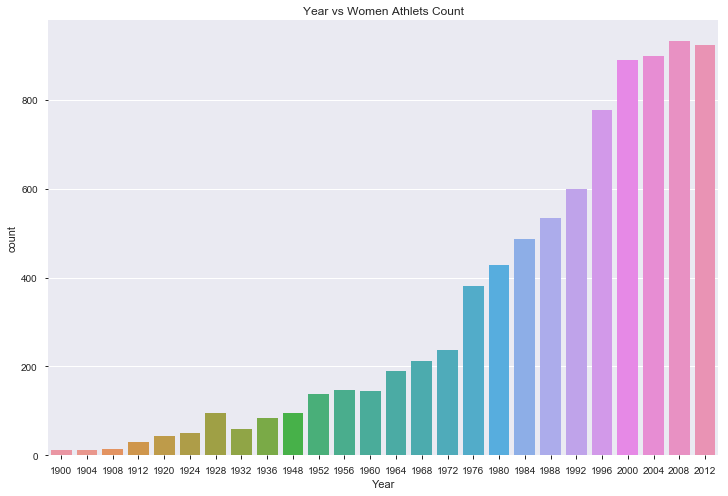

In [28]:
#Max no of Women athletes participated in the 2008 summer olympics
women_olympic_df = olympic[olympic['Gender'] == 'Women']
fig,ax =plt.subplots(figsize=(12,8))
sns.countplot(data = women_olympic_df,x = 'Year')
plt.title('Year vs Women Athlets Count')

- Year 2008 marked the maximum women athlete participation
- Maximum men athletes participated in the year 1920
- The number of women participents has grown exponentially over the years

<a id=section504></a>
### Section 5.4 In which year maximun number of medals were won?

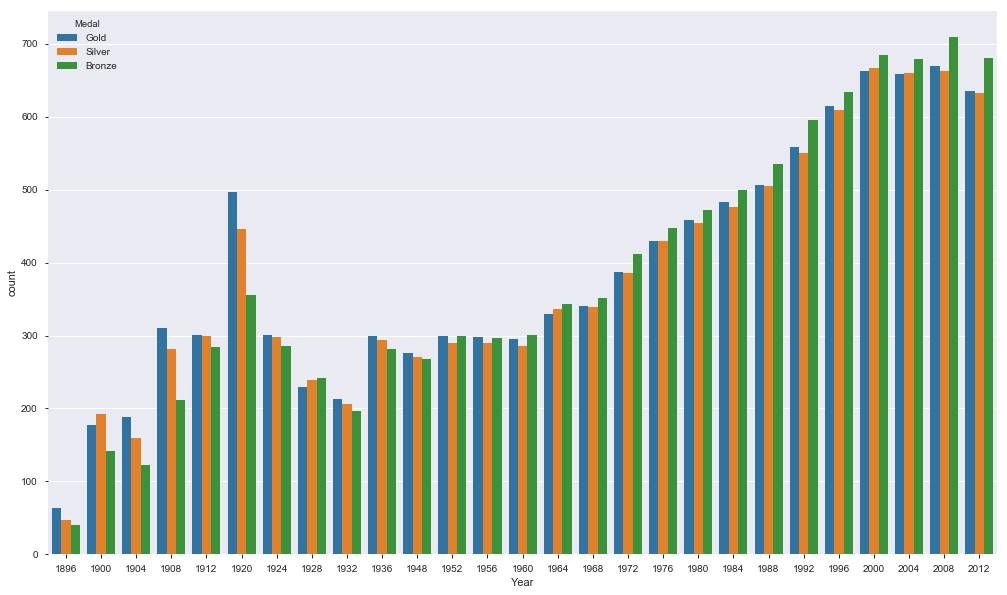

In [4]:
#Shows the number of medals won every year
plt.figure(figsize=(17,10))
sns.countplot(x="Year", hue="Medal", data=olympic)
plt.show()

# The following can be observed from the plot above:
- Year 2008 has the highest number of medals won
- Year 2008 has the highest number of Gold and Bronze Medals won
- Year 2000 has the highest number of silver medals won
- The games were cancelled for 1916, 1940, 1944 because of the World War I and II

<a id=section505></a>
### section 5.5 Which country has won the highest number of medals?

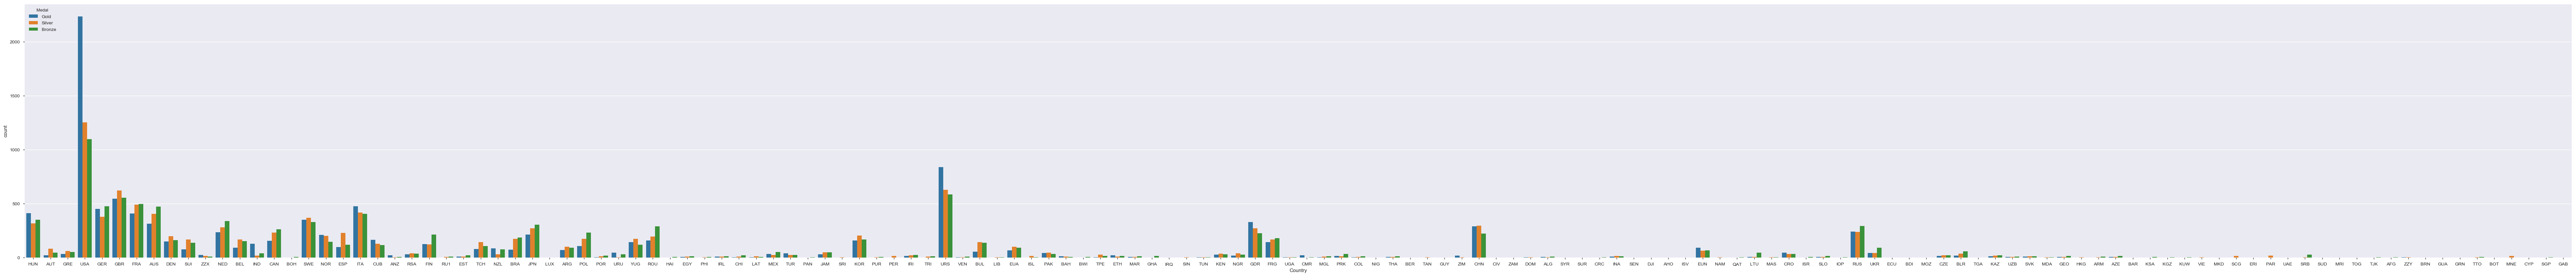

In [8]:
plt.figure(figsize=(100,10))
sns.countplot(x="Country",hue="Medal", data=olympic)
plt.show()

- USA leads the tally of all 3 medal categories i.e. Gold, Silver and Broze 
- No medals won by countries like SUD(Sudan), UAE(United Arab Emirates), GAB(Gabon) etc

<a id=section506></a>
### section 5.6 Which countries have participated in which years?

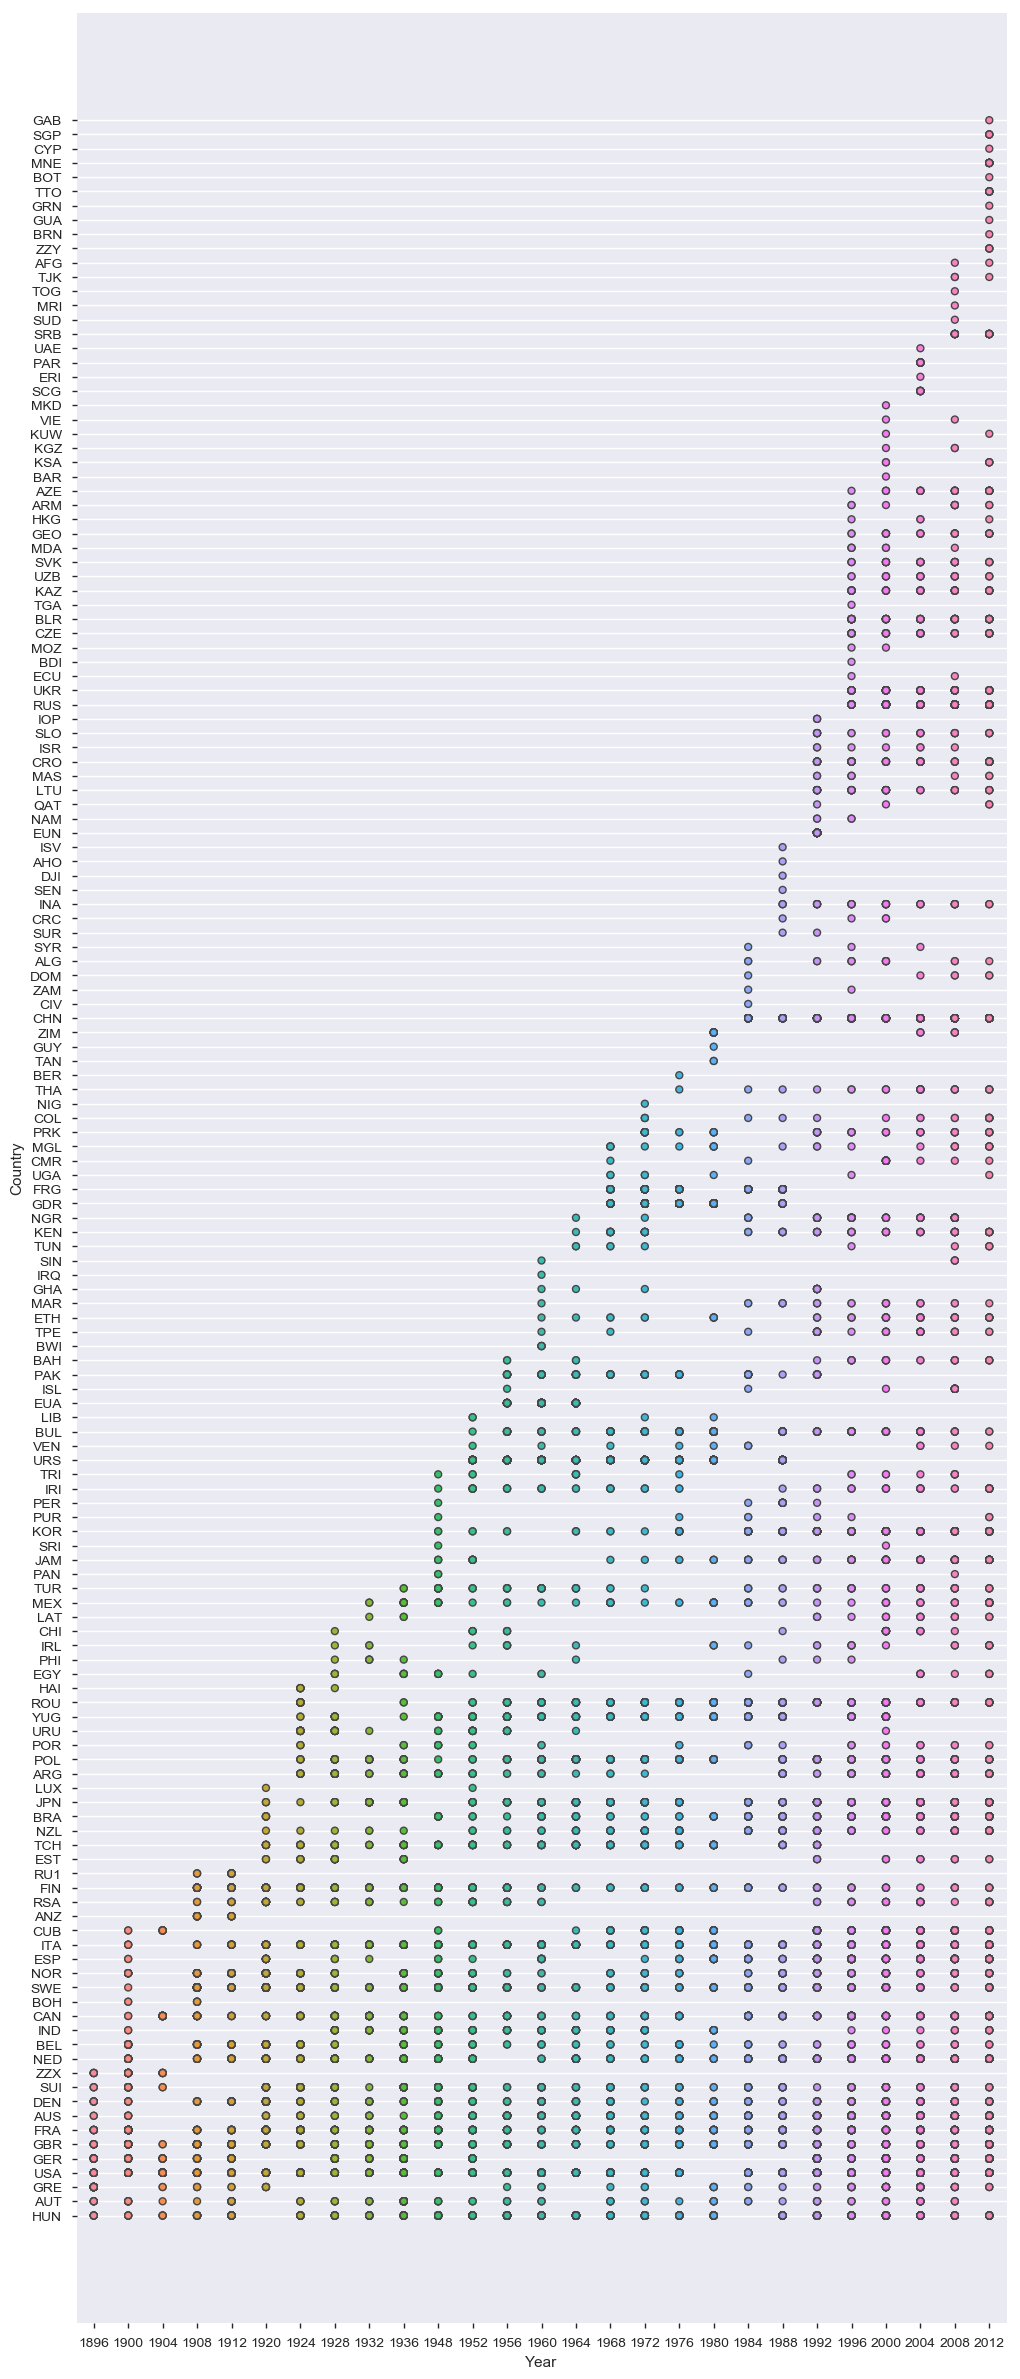

In [24]:
plt.figure(figsize=(12,30))
sns.stripplot(x='Year', y='Country', data=olympic, jitter=False, dodge=True, orient='v', edgecolor='gray', linewidth=1)
plt.show()

- Each vertical line of dots indicates the countries participating in the Olympics against the year column
- The missing dots against the Country name indicate that the country has not participated in the olympics for that year
- IOP is for Independent Olympic Participants who could not compete as a team
- ZZX Mixed team to identify medals won by mixed teams of athletes from multiple nations in the Games of 1896, 1900, and 1904

<a id=section507></a>
### section 5.7 Countrywise Male vs Female

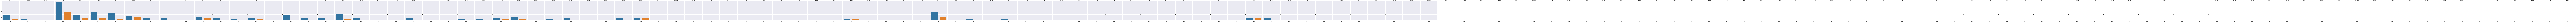

In [6]:
#Indicated country wise male and feamle participation for the olympics
sns.catplot('Gender', col='Country',data=olympic[olympic.Country.notnull()],kind='count',height=7, aspect=.8)


- USA has the maximum number of men and women athletes followed by GBR

<a id=section508></a>
### section 5.8 Countrywise medals won every year 

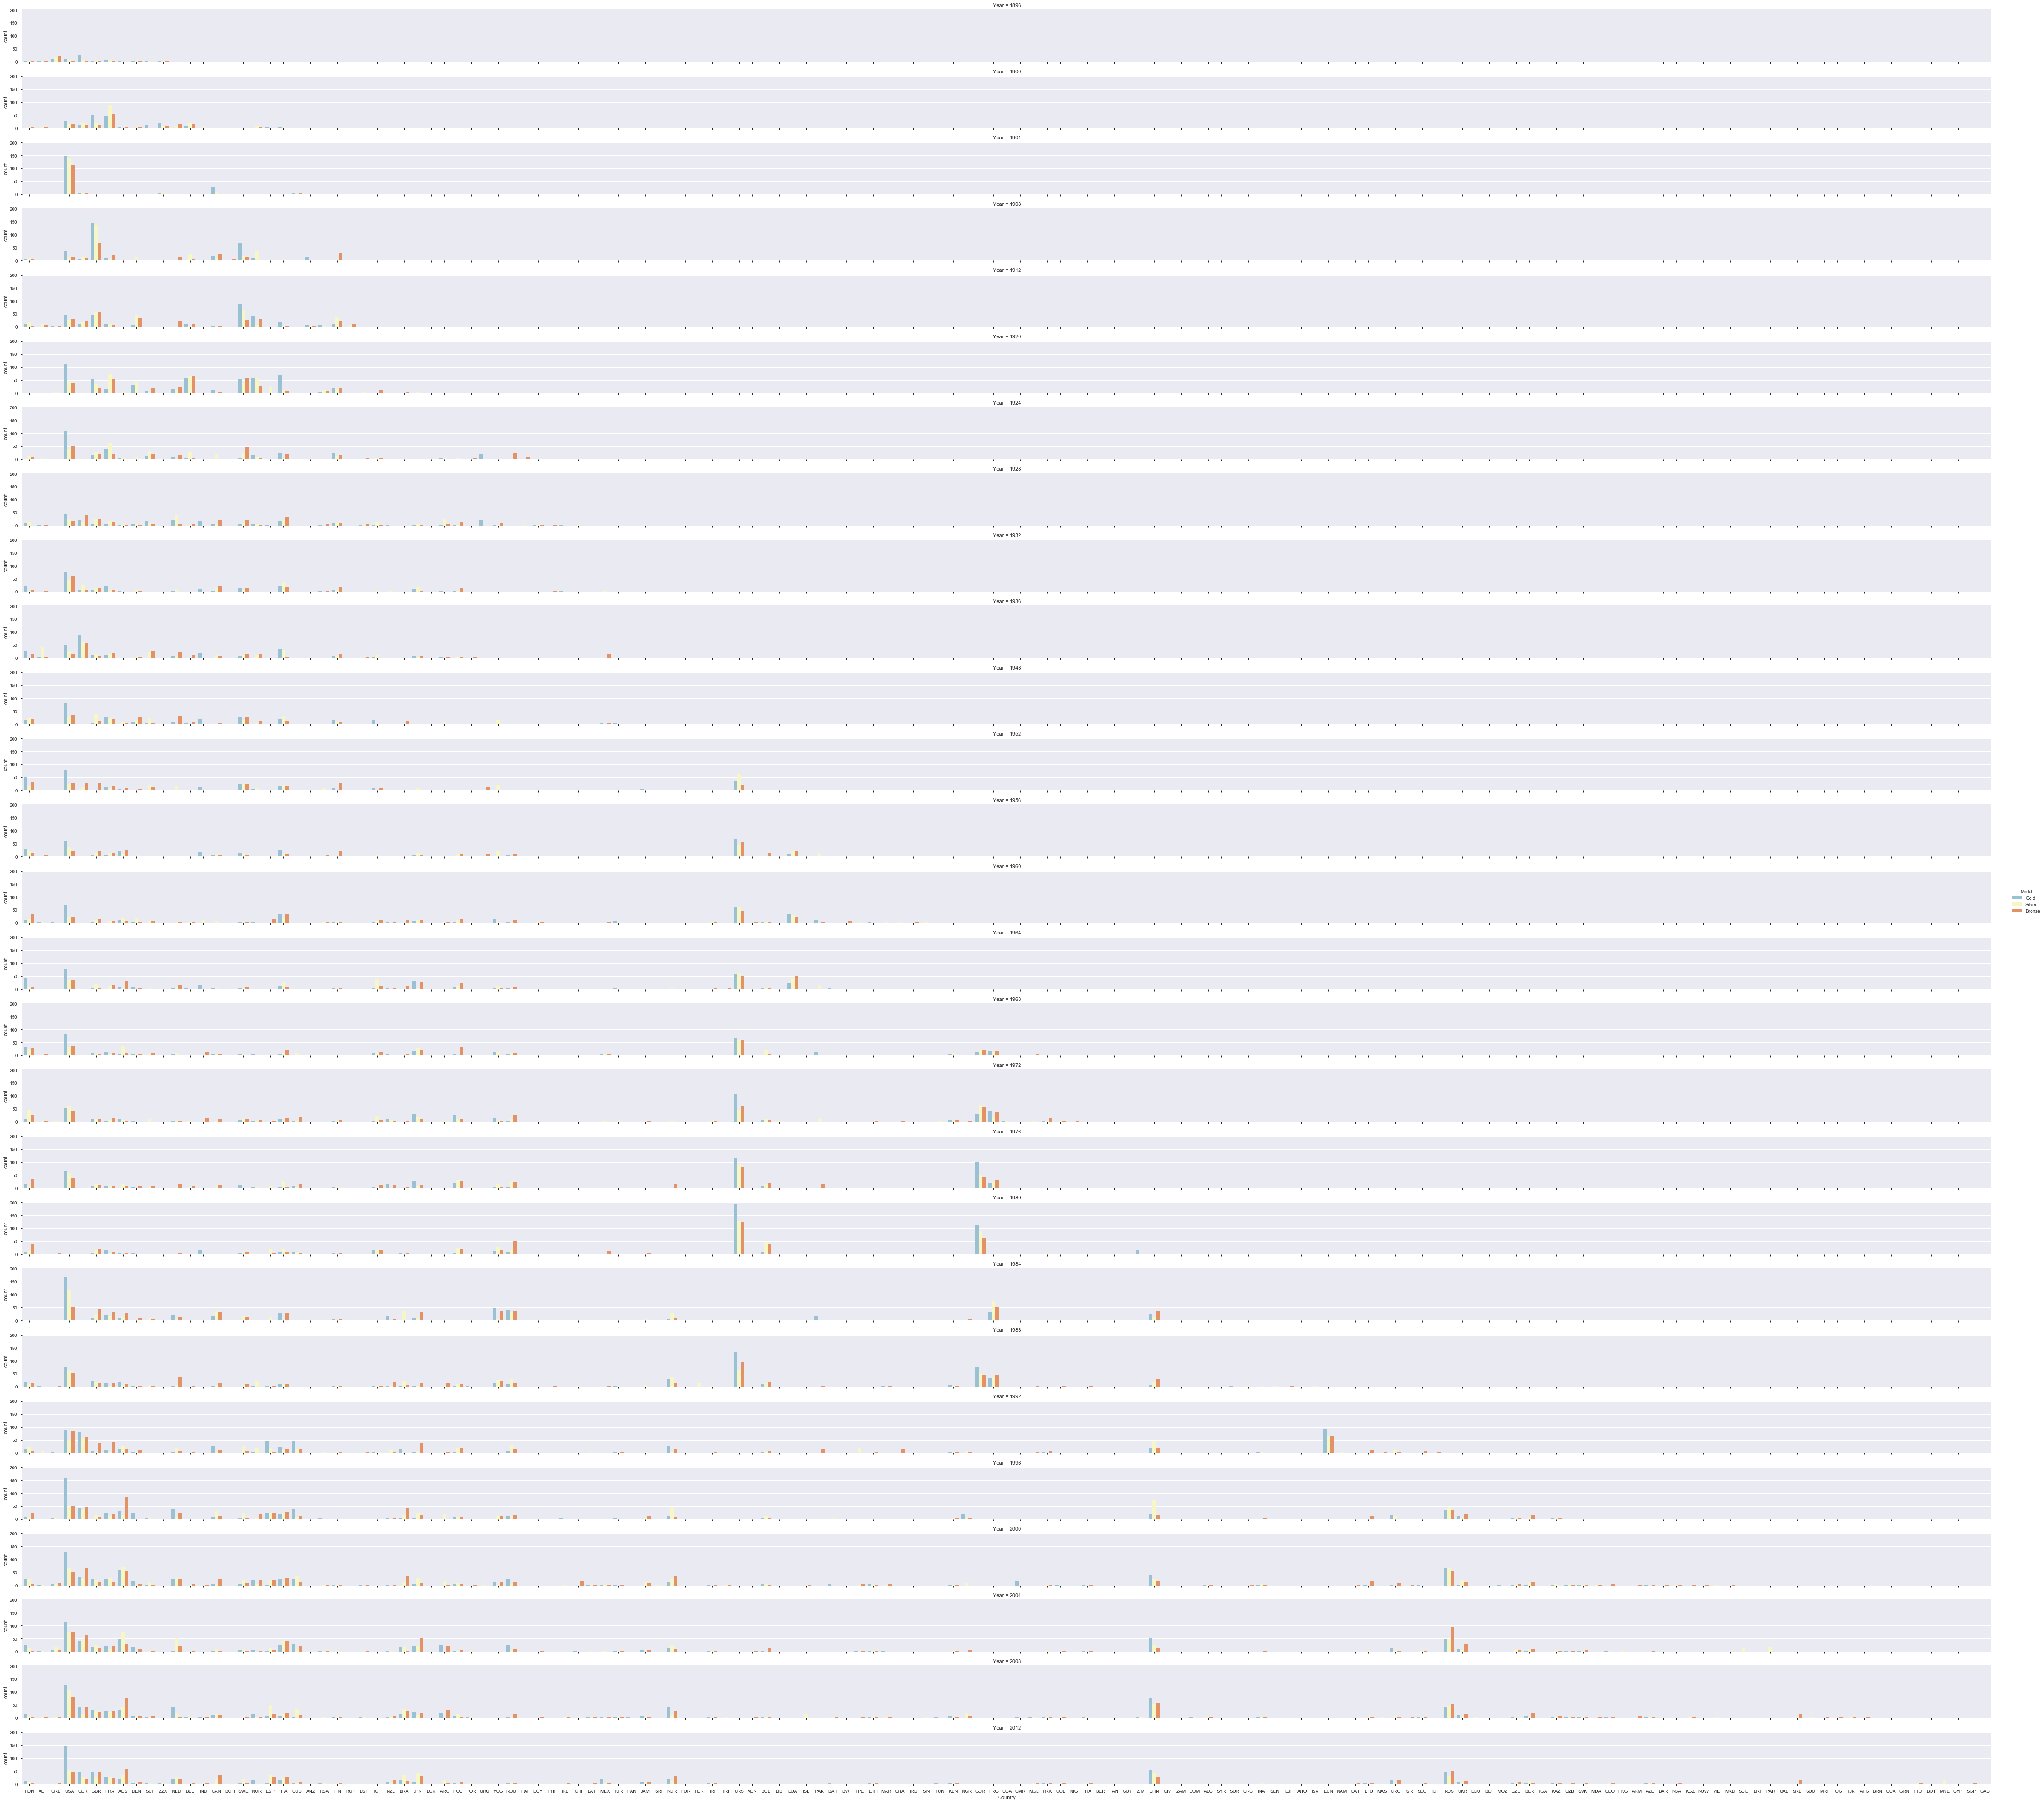

In [7]:
#Indicates country wise medals won in olympics per year in each row
sns.catplot(x='Country',
            hue='Medal',row='Year',
            data=olympic[olympic.Country.notnull()],hue_order=['Gold','Silver','Bronze'],
            orient="v", height=2, aspect=30, palette="inferno",
        kind="count", dodge=True)

<a id=section509></a>
### section 5.9 Performance of the countries till 2012

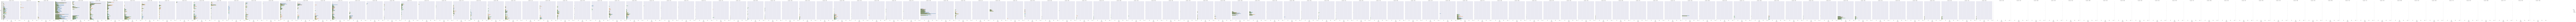

In [11]:
#Indicates year wise medals won in olympics by each country
sns.catplot(y='Year',hue='Medal', col='Country',
            data=olympic[olympic.Country.notnull()],hue_order=['Gold','Silver','Bronze'],
           kind='count',height=5, aspect=.8)

<a id=section510></a>
### Section 5.10 Which cities have hosted olympic games more than one time? 

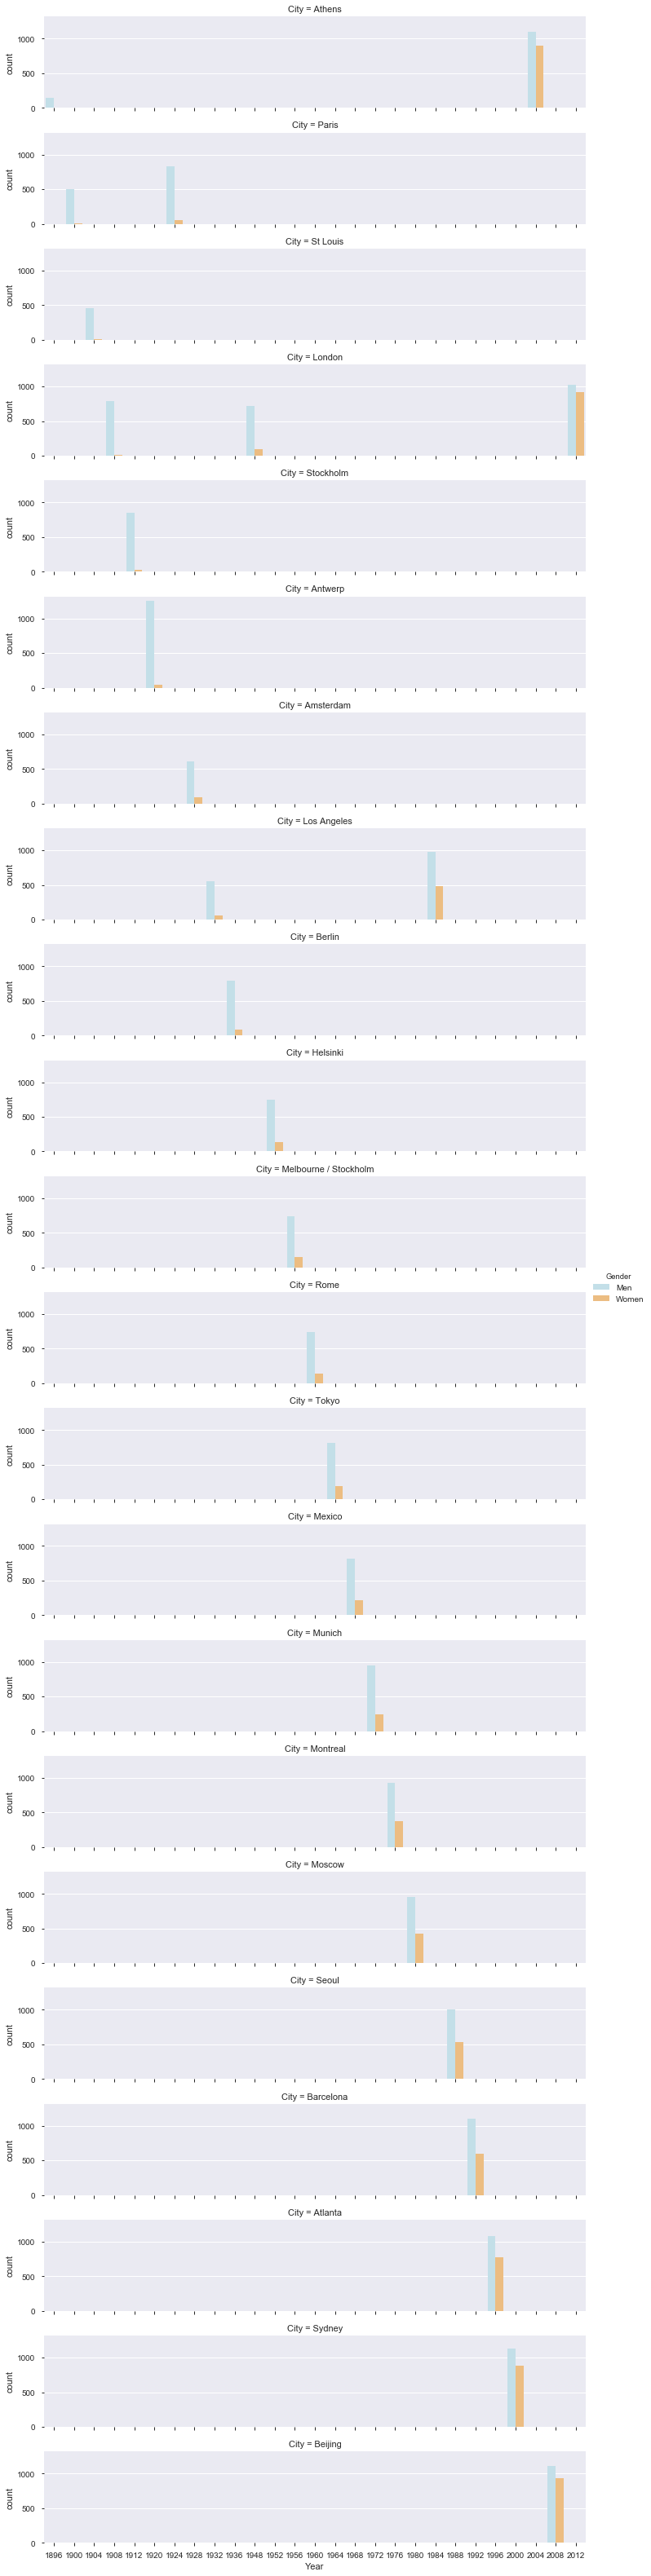

In [12]:
#Indicates the cities with no of times hosting the olympics and the male an female participents in that year with count 
sns.catplot(x='Year',
            hue='Gender',row='City',
            data=olympic[olympic.Country.notnull()],
            orient="h", height=2, aspect=5, palette="RdYlBu_r",
            kind="count", dodge=True)

- London hosted the Olympics 3 times in 1908, 1948 and 2012
- Athens, Paris and Los Angeles hosted 2 times each

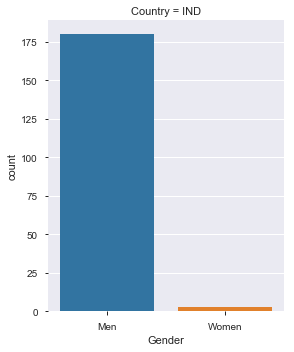

In [15]:
# Show the  chart for india's men and women athletes participation in olympics
sns.catplot('Gender', col='Country',data=olympic[olympic['Country'] == 'IND'],kind='count',height=5, aspect=.8)

### Conclusion
- USA leads the medals tally and has won maximum number of medals
- USA perfromance in the olympic games is the consistent 
- Women athlete participation has increased exponentially over that last few years
